In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d l3llff/flowers

Dataset URL: https://www.kaggle.com/datasets/l3llff/flowers
License(s): CC0-1.0
flowers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import os


current_dir = os.getcwd()
print("Current working directory:", current_dir)

Current working directory: /content


In [ ]:
!unzip flowers.zip

Archive:  flowers.zip
replace flowers/astilbe/10091895024_a2ea04cda6_c.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os
from PIL import Image

dataset_dir = "/content/flowers"
total_width = 0
total_height = 0
num_images = 0


for folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder)
    if os.path.isdir(folder_path):
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            with Image.open(img_path) as img:
                width, height = img.size
                total_width += width
                total_height += height
                num_images += 1


avg_width = total_width / num_images if num_images > 0 else 0
avg_height = total_height / num_images if num_images > 0 else 0

print(f"Average width: {avg_width:.2f}")
print(f"Average height: {avg_height:.2f}")
print(num_images)

Average width: 288.78
Average height: 276.59
15740


Average width: 288.78
Average height: 276.59


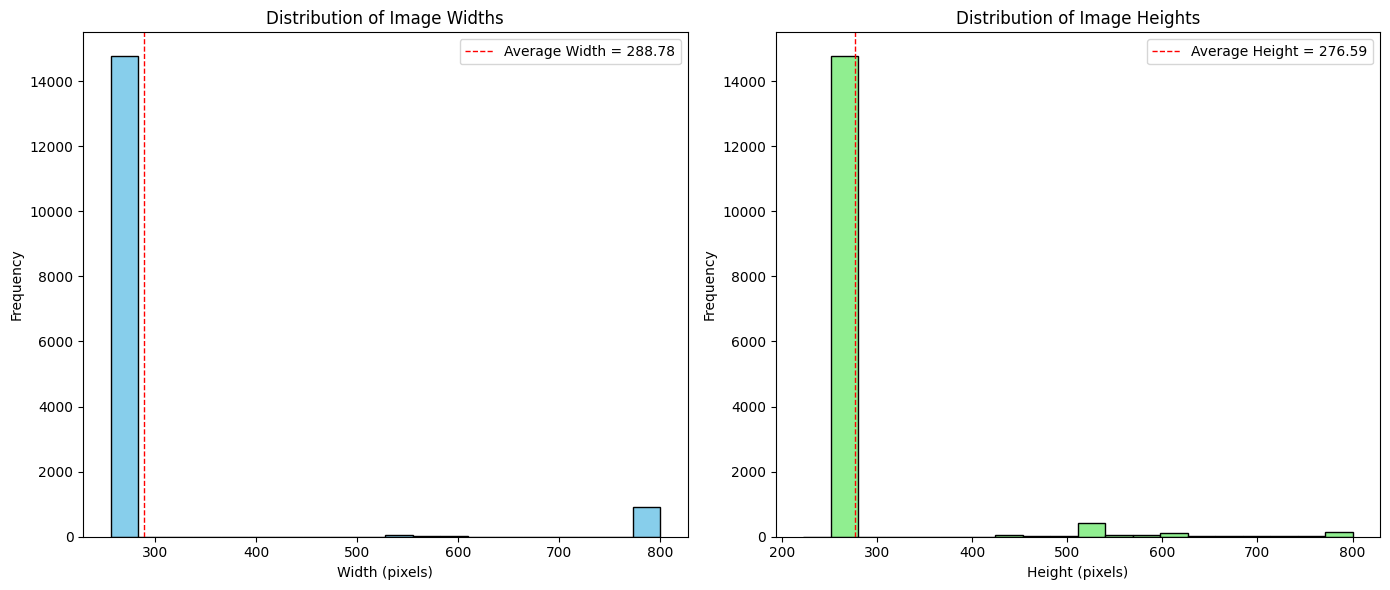

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image


dataset_dir = "/content/flowers"
widths = []
heights = []

for folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder)
    if os.path.isdir(folder_path):
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            with Image.open(img_path) as img:
                width, height = img.size
                widths.append(width)
                heights.append(height)


avg_width = sum(widths) / len(widths) if widths else 0
avg_height = sum(heights) / len(heights) if heights else 0
print(f"Average width: {avg_width:.2f}")
print(f"Average height: {avg_height:.2f}")

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
axs[0].hist(widths, bins=20, color='skyblue', edgecolor='black')
axs[0].axvline(avg_width, color='red', linestyle='dashed', linewidth=1)
axs[0].set_title('Distribution of Image Widths')
axs[0].set_xlabel('Width (pixels)')
axs[0].set_ylabel('Frequency')
axs[0].legend([f'Average Width = {avg_width:.2f}'])

# Histogram]
axs[1].hist(heights, bins=20, color='lightgreen', edgecolor='black')
axs[1].axvline(avg_height, color='red', linestyle='dashed', linewidth=1)
axs[1].set_title('Distribution of Image Heights')
axs[1].set_xlabel('Height (pixels)')
axs[1].set_ylabel('Frequency')
axs[1].legend([f'Average Height = {avg_height:.2f}'])

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint


dataset_dir = "/content/flowers"
img_width, img_height = 288, 276
batch_size = 64
epochs = 30
num_classes = 16

# Data Generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Model Creation
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])




Found 12599 images belonging to 16 classes.
Found 3141 images belonging to 16 classes.


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:

checkpoint = ModelCheckpoint('flower_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')


In [ ]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[checkpoint]
)


model.save('flower_model_final.h5')

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


197/197 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step - accuracy: 0.1704 - loss: 2.7249 - val_accuracy: 0.3999 - val_loss: 1.8413
Epoch 2/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.3399 - loss: 1.9599 - val_accuracy: 0.4550 - val_loss: 1.6140
Epoch 3/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.3991 - loss: 1.7910 - val_accuracy: 0.5008 - val_loss: 1.5043
Epoch 4/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.4269 - loss: 1.6856 - val_accuracy: 0.5212 - val_loss: 1.4623
Epoch 5/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.4643 - loss: 1.5938 - val_accuracy: 0.5447 - val_loss: 1.3521
Epoch 6/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.4766 - loss: 1.5201 - val_accuracy: 0.5798 - val_loss: 1.3052
Epoch 7/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.5002 - loss: 1.4770 - val_accuracy: 0.5861 - val_loss: 1.2619
Epoch 8/30
197/197 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.5229 - loss: 1.4165 - val_accuracy: 0.613

In [ ]:
astible, bellflower,black_eyed_susan,calendula,california_poppy,carnation,common_daisy,coreopsis,daffodil,dandelion,iris,magnolia,rose,sunflower,tulip,water_lily

In [ ]:
model.save("/content/flower_model_final.keras")




In [ ]:
import json

# Save class labels
class_labels = train_generator.class_indices
with open('class_labels.json', 'w') as f:
    json.dump(class_labels, f)


In [ ]:

validation_loss, validation_accuracy = model.evaluate(validation_generator, verbose=1)
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")


50/50 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.7313 - loss: 0.8108
Validation Accuracy: 74.31%


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os


def predict_flower(image_path):
    img = image.load_img(image_path, target_size=(288,276))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0


    predictions = model.predict(img_array)


    predicted_class = np.argmax(predictions, axis=1)[0]


    predicted_label = list(validation_generator.class_indices.keys())[predicted_class]
    print(f"Predicted flower type: {predicted_label}")


image_path = "/content/flowers/rose/10731426816_050902833d_c.jpg"
predict_flower(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted flower type: rose


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("/content/flower_model_final.keras")

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 286, 274, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 143, 137, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 141, 135, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 70, 67, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 68, 65, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 34, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 139264)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      17,825,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │           2,064 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,842,466 (136.73 MB)

 Trainable params: 17,921,232 (68.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,921,234 (68.36 MB)

In [ ]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.3 MB/s eta 0:00:00


In [ ]:
from keras_tuner.tuners import RandomSearch

In [ ]:

img_width, img_height = 288, 276
num_classes = 16 s
batch_size = 64
epochs = 30
dataset_dir = "/content/flowers"

from keras_tuner.tuners import RandomSearch
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint


In [ ]:
#Hyper parameter Tuning
img_width, img_height = 288, 276
num_classes = 16

from keras_tuner.tuners import RandomSearch
from tensorflow.keras.layers import BatchNormalization, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint


def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(img_width, img_height, 3)))
    model.add(Conv2D(hp.Int('conv_1_filters', 32, 128, step=32), (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Conv2D(hp.Int('conv_2_filters', 64, 256, step=64), (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(hp.Int('dense_units', 64, 256, step=64), activation='relu'))
    model.add(Dropout(hp.Float('dropout_rate', 0.2, 0.5, step=0.1)))

    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.001, 0.0005, 0.0001])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='tuner_dir',
    project_name='flower_tuning'
)





In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image data generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)


train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='tuner_dir',
    project_name='flower_tuning'
)


tuner.search(train_generator, epochs=epochs, validation_data=validation_generator)

#Saving Best Model-
best_model = tuner.get_best_models(num_models=1)[0]
best_model.save("/content/flower_model_final.keras")

Trial 2 Complete [00h 00m 45s]

Best val_accuracy So Far: None
Total elapsed time: 00h 01m 28s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
96                |128               |conv_1_filters
192               |128               |conv_2_filters
64                |256               |dense_units
0.4               |0.3               |dropout_rate
0.001             |0.001             |learning_rate

Epoch 1/30
 49/197 ━━━━━━━━━━━━━━━━━━━━ 2:23 968ms/step - accuracy: 0.1134 - loss: 105.5590

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, 

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py", line 53, in quick_execute
    tensors = pywrap_tfe.TFE_Py_Execute(ctx._handle, device_name, op_name,
tensorflow.python.framework.errors_impl.ResourceExhaustedError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-30-e43474e2988c>", line 43, in <cell line: 43>

  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 234, in search

  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 274, in _try_run_and_update_trial

  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/base_tuner.py", line 239, in _run_and_update_trial

  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 314, in run_trial

  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/tuner.py", line 233, in _build_and_fit_model

  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/src/engine/hypermodel.py", line 149, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 318, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

Out of memory while trying to allocate 6570910944 bytes.
	 [[{{node StatefulPartitionedCall}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_one_step_on_iterator_12356]
